# Задание 1. Пункт 2
Выбрать две переменные. Построить и визуализировать (показать разделяющую кривую) решения методами линейный и квадратичный дискриминант, логистическая регрессия, SVM (линейное и квадратичное ядро). Пример подходящей визуализации есть в sklearn.


In [33]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns

Создаём функцию, которая бы визуализировала наши решения

In [34]:
def plot_contours(ax, clf, x, y, title):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    mesh_x, mesh_y = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
    
    ax.contourf(mesh_x, mesh_y, clf.predict(np.array([mesh_x.ravel(), mesh_y.ravel()]).T).reshape(mesh_x.shape), alpha=0.8, cmap=sns.color_palette("Dark2", 3, as_cmap=True))
    ax.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=sns.color_palette("Dark2", 3, as_cmap=True))
    ax.set_title(title)

Выбираем наиболее скорелированные колонки (3 и 4 в нашем случае)

In [35]:
iris = datasets.load_iris()
x = iris.data[:, [2,3]]
y = iris.target

## Линейный дискриминантный анализ
Можно почитать тут: https://skine.ru/articles/431766/#:~:text=Линейный%20дискриминантный%20анализ%20-%20это,пространство%20с%20более%20низкими%20измерениями

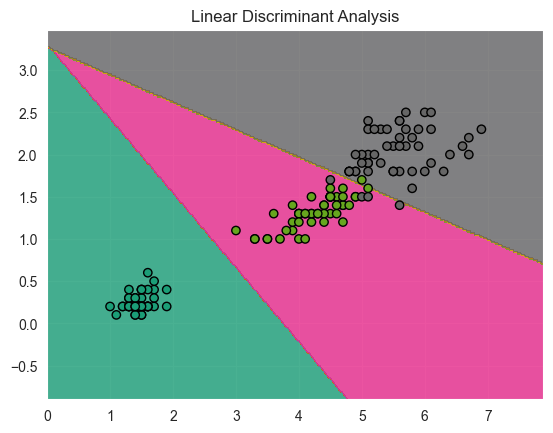

In [36]:
lda = LinearDiscriminantAnalysis()
lda.fit(x, y)
fig, ax = plt.subplots()
plot_contours(ax, lda, x, y, title='Linear Discriminant Analysis')
plt.show()

## Квадратичный дискриминантный анализ
Можно почитать вот тут: https://online.stat.psu.edu/stat508/book/export/html/696

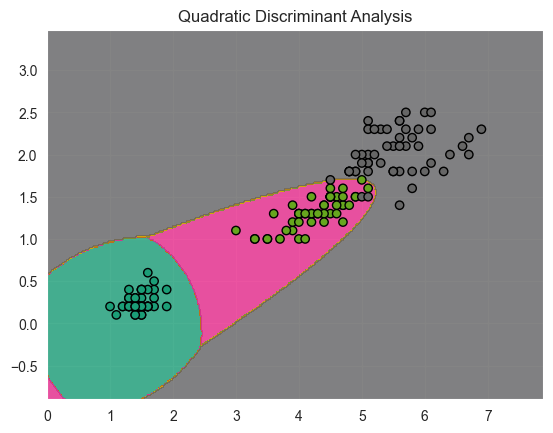

In [37]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x, y)
fig, ax = plt.subplots()
plot_contours(ax, qda, x, y, title='Quadratic Discriminant Analysis')
plt.show()

## Логистическая регрессия

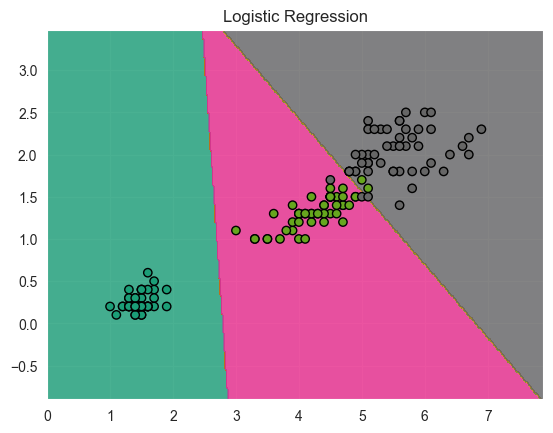

In [38]:
logreg = LogisticRegression()
logreg.fit(x, y)
fig, ax = plt.subplots()
plot_contours(ax, logreg, x, y, title='Logistic Regression')
plt.show()

## SVM (Support Vector Machine) или "Метод опорных векторов" (линейное ядро)
Можно почитать тут: https://www.kaggle.com/code/rajeev102001/svm-support-vector-machine-for-classification

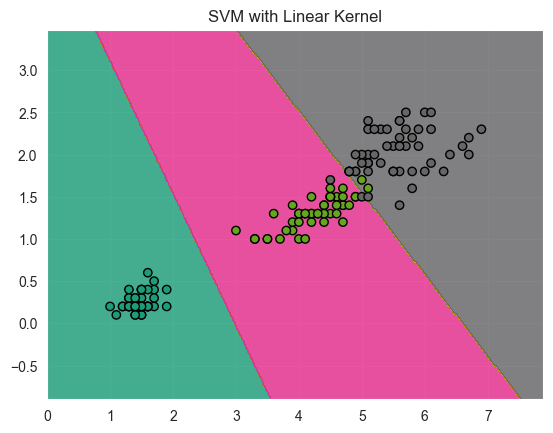

In [39]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(x, y)
fig, ax = plt.subplots()
plot_contours(ax, svc_linear, x, y, title='SVM with Linear Kernel')
plt.show()

## SVM (Support Vector Machine) или "Метод опорных векторов" (квадратичное ядро)
Можно почитать тут: https://www.kaggle.com/code/rajeev102001/svm-support-vector-machine-for-classification
А вот тут есть формула: https://en.wikipedia.org/wiki/Radial_basis_function_kernel

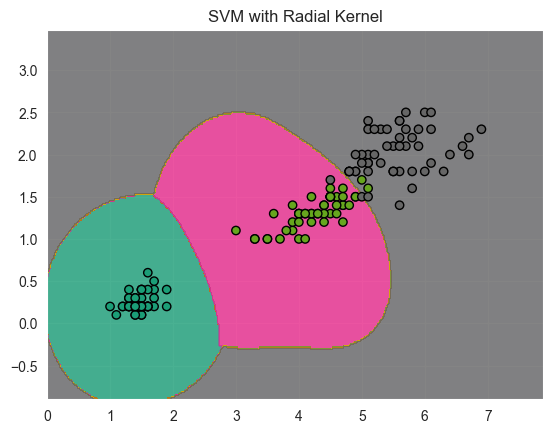

In [40]:
svc_rbf = SVC(kernel='rbf', gamma=1.00)
svc_rbf.fit(x, y)
fig, ax = plt.subplots()
plot_contours(ax, svc_rbf, x, y, title='SVM with Radial Kernel')
plt.show()